--------------------------------------------------------------------------------
# **Importing Libraries**

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install pandas-profiling
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the libraries.

import opendatasets as od
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree, decomposition, datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import math
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

<ipython-input-2-dbbaed696a6e>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


--------------------------------------------------------------------------------
# **Retrieving Data and Preprocessing**

In [ ]:
# {"username":"davidgomezcamargo","key":"14b174c2820e62e06affaaf6a040ddd4"}

# Download data using Kaggle API.
od.download("https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset")

Skipping, found downloaded files in "./diabetes-health-indicators-dataset" (use force=True to force download)


In [ ]:
# Reading the CSV files.

# Balanced dataset with 70,692 data points.
df = pd.read_csv("/content/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Imbalanced dataset with 253,680 data points.
df1 = pd.read_csv("/content/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

# Imbalanced dataset with 3 labels and 253,680 data points.
df2 = pd.read_csv("/content/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv")

# Displaying the contents of the XLSX file.
#print(df)

In [ ]:
# Droping duplicate records.

df.drop_duplicates(inplace = True)
df.shape

(69057, 22)

In [ ]:
# Converting all attributes to INT type

df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int)
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [ ]:
# Updating values for MentHealth, PhysHealth, BMI

df.BMI[df['BMI'] <= 18 ] = 0 # Underweight
df.BMI[df['BMI'] == 19 ] = 1 # Healthy
df.BMI[df['BMI'] == 20 ] = 1 # Healthy
df.BMI[df['BMI'] == 21 ] = 1 # Healthy
df.BMI[df['BMI'] == 22 ] = 1 # Healthy
df.BMI[df['BMI'] == 23 ] = 1 # Healthy
df.BMI[df['BMI'] == 24 ] = 1 # Healthy
df.BMI[df['BMI'] == 25 ] = 2 # Overweight
df.BMI[df['BMI'] == 26 ] = 2 # Overweight
df.BMI[df['BMI'] == 27 ] = 2 # Overweight
df.BMI[df['BMI'] == 28 ] = 2 # Overweight
df.BMI[df['BMI'] == 29 ] = 2 # Overweight
df.BMI[df['BMI'] >= 30 ] = 3 # Obesity

df.MentHlth[df['MentHlth'] == 0 ] = 0
df['MentHlth'] = np.where( (df['MentHlth'] > 0) & (df['MentHlth'] <= 5) , 1, df['MentHlth'] )
df['MentHlth'] = np.where( (df['MentHlth'] > 5) & (df['MentHlth'] <= 10) , 2, df['MentHlth'] )
df['MentHlth'] = np.where( (df['MentHlth'] > 10) & (df['MentHlth'] <= 15) , 3, df['MentHlth'] )
df['MentHlth'] = np.where( (df['MentHlth'] > 15) & (df['MentHlth'] <= 20) , 4, df['MentHlth'] )
df['MentHlth'] = np.where( (df['MentHlth'] > 20) & (df['MentHlth'] <= 25) , 5, df['MentHlth'] )
df.MentHlth[df['MentHlth'] > 25 ] = 6

df.PhysHlth[df['PhysHlth'] == 0 ] = 0
df['PhysHlth'] = np.where( (df['PhysHlth'] > 0) & (df['PhysHlth'] <= 5) , 1, df['PhysHlth'] )
df['PhysHlth'] = np.where( (df['PhysHlth'] > 5) & (df['PhysHlth'] <= 10) , 2, df['PhysHlth'] )
df['PhysHlth'] = np.where( (df['PhysHlth'] > 10) & (df['PhysHlth'] <= 15) , 3, df['PhysHlth'] )
df['PhysHlth'] = np.where( (df['PhysHlth'] > 15) & (df['PhysHlth'] <= 20) , 4, df['PhysHlth'] )
df['PhysHlth'] = np.where( (df['PhysHlth'] > 20) & (df['PhysHlth'] <= 25) , 5, df['PhysHlth'] )
df.PhysHlth[df['PhysHlth'] > 25 ] = 6

In [ ]:
# Balancing dataset to 65,000 data points.

DataFrame = pd.concat([df[df.Diabetes_binary == 0].sample(32500), df[df.Diabetes_binary == 1].sample(32500)], ignore_index=True, axis=0)
DataFrame

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                    0       1         1          1    2       1       0   
1                    0       0         0          0    1       0       0   
2                    0       0         0          1    2       1       0   
3                    0       1         0          1    3       0       0   
4                    0       0         1          1    2       0       0   
...                ...     ...       ...        ...  ...     ...     ...   
64995                1       1         1          1    3       0       0   
64996                1       0         1          1    3       1       0   
64997                1       1         1          1    3       0       0   
64998                1       0         0          1    3       0       0   
64999                1       1         0          1    2       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                         0             1       0  ...              1   
1                         0             1       1  ...              1   
2                         0             1       0  ...              1   
3                         0             1       1  ...              1   
4                         0             1       1  ...              1   
...                     ...           ...     ...  ...            ...   
64995                     0             1       1  ...              1   
64996                     0             1       0  ...              1   
64997                     1             0       1  ...              1   
64998                     0             1       1  ...              1   
64999                     0             0       0  ...              1   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                0        3         0         0         0    1    8   
1                0        1         0         0         0    0    9   
2                0        3         0         1         0    0    2   
3                0        1         4         0         0    1   11   
4                0        3         0         0         0    0   12   
...            ...      ...       ...       ...       ...  ...  ...   
64995            0        4         0         1         1    0   12   
64996            0        3         6         0         0    0    5   
64997            1        4         1         5         1    0    8   
64998            0        4         0         6         0    1    9   
64999            0        5         0         6         1    0    8   

       Education  Income  
0              6       8  
1              6       3  
2              6       8  
3              6       8  
4              6       8  
...          ...     ...  
64995          5       6  
64996          4       7  
64997          3       4  
64998          6       7  
64999          5       5  

[65000 rows x 22 columns]

--------------------------------------------------------------------------------
# **Data Profile and Correlation**

In [ ]:
# Profile the dataset.

Profile = ProfileReport(DataFrame)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the correlation in the profiling above, we can see the following correlations:
*   Education and Income (positive correlation)
*   Mental Health and General Health (positive correlation)
*   Physical Health and General Health (positive correlation)
*   Physical Health and Difficulty Walking (positive correlation)
*   Physical Activity and Difficulty Walking (negative correlation)
*   General Health and Income (negative correlation)
*   Difficulty Walking and Income (negative correlation)





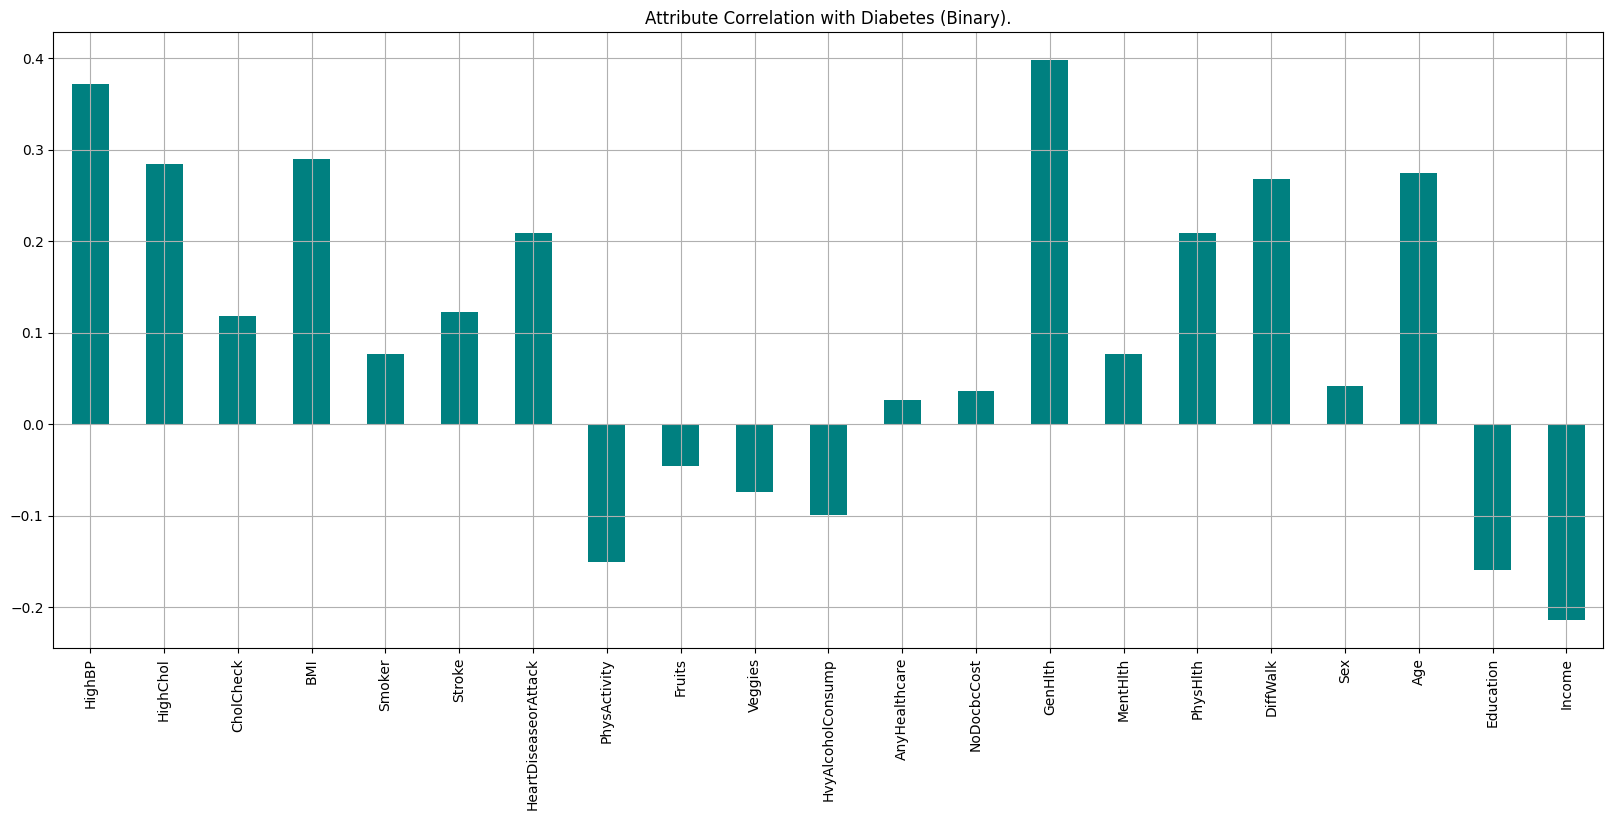

In [ ]:
DataFrame.drop('Diabetes_binary', axis = 1).corrwith(DataFrame.Diabetes_binary).plot(kind = 'bar', grid = True, figsize = (20, 8), title = "Attribute Correlation with Diabetes (Binary).", color = "Teal");

From the Attribute Correlation with Diabetes (Binary) plot above, we can rank those attributes with correlation rate over 0.2:
1.   General Health (positive correlation).
2.   High Blood Pressure (positive correlation).
3.   Body Mass Index (positive correlation).
4.   High Cholesterol (positive correlation).
5.   Age (positive correlation).
6.   Difficulty Walking (positive correlation).
7.   Income (negative correlation).
8.   Heart Disease or Attack (positive correlation).
9.   Physical Health (positive correlation).

--------------------------------------------------------------------------------
# **Chi-Square (Categorical) Feature Selection**

In [ ]:
X = DataFrame.drop(columns=['Diabetes_binary'], axis=1)
y = DataFrame['Diabetes_binary']
print(X, y)

       HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0           1         1          1    2       1       0                     0   
1           0         0          0    1       0       0                     0   
2           0         0          1    2       1       0                     0   
3           1         0          1    3       0       0                     0   
4           0         1          1    2       0       0                     0   
...       ...       ...        ...  ...     ...     ...                   ...   
64995       1         1          1    3       0       0                     0   
64996       0         1          1    3       1       0                     0   
64997       1         1          1    3       0       0                     1   
64998       0         0          1    3       0       0                     0   
64999       1         0          1    2       0       0                     0   

       PhysActivity  Fruits

In [ ]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X,y)
print(chi_scores)

(array([3.87553897e+03, 2.46274830e+03, 2.30785664e+01, 1.55694493e+03,
       1.96777742e+02, 9.19198238e+02, 2.40608053e+03, 4.48693996e+02,
       5.25550367e+01, 7.70259608e+01, 6.07384967e+02, 1.99812933e+00,
       7.87627825e+01, 4.42366742e+03, 1.23527450e+03, 8.90126613e+03,
       3.47896438e+03, 6.26545142e+01, 4.68718992e+03, 3.59226497e+02,
       2.50028016e+03]), array([0.00000000e+000, 0.00000000e+000, 1.55514667e-006, 0.00000000e+000,
       1.05445630e-044, 6.58268438e-202, 0.00000000e+000, 1.38783882e-099,
       4.18358455e-013, 1.68725452e-018, 4.14501626e-134, 1.57493475e-001,
       7.00341111e-019, 0.00000000e+000, 1.31600684e-270, 0.00000000e+000,
       0.00000000e+000, 2.46339691e-015, 0.00000000e+000, 4.14965961e-080,
       0.00000000e+000]))


<Axes: >

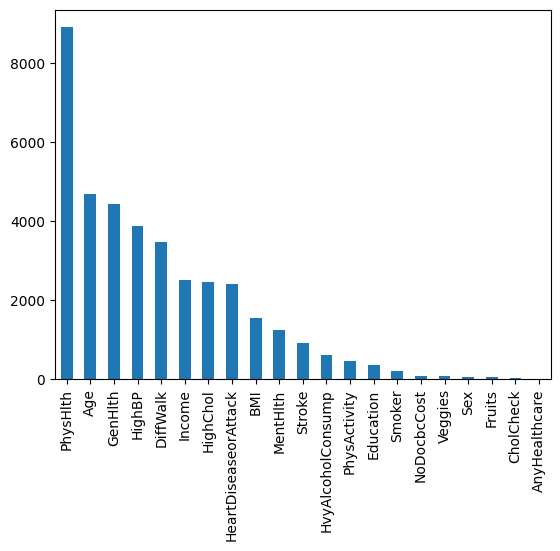

In [ ]:
# Higher the Chi-Square value, higher the importance.

chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

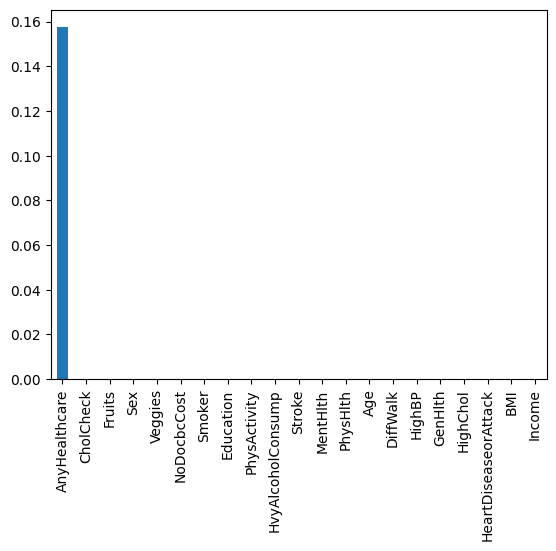

In [ ]:
# If p value > 0.5, lower the importance.

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [ ]:
# Chi-squared stats of non-negative features for classification tasks.

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=5).fit(X,y)
print(X.columns[selector.get_support()])

Index(['HighBP', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age'], dtype='object')


In [ ]:
# Mutual information for a discrete target.

from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=5).fit(X,y)
print(X.columns[selector.get_support()])

Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age'], dtype='object')


In [ ]:
# ANOVA F-value between label/feature for classification tasks.

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5).fit(X,y)
print(X.columns[selector.get_support()])

Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age'], dtype='object')


--------------------------------------------------------------------------------
# **Different Datasets**

In [ ]:
# First DataFrame: Balanced dataset (65,000 data points) with all 21 attributes.

DataFrame1 = DataFrame
DataFrame1

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                    0       1         1          1    2       1       0   
1                    0       0         0          0    1       0       0   
2                    0       0         0          1    2       1       0   
3                    0       1         0          1    3       0       0   
4                    0       0         1          1    2       0       0   
...                ...     ...       ...        ...  ...     ...     ...   
64995                1       1         1          1    3       0       0   
64996                1       0         1          1    3       1       0   
64997                1       1         1          1    3       0       0   
64998                1       0         0          1    3       0       0   
64999                1       1         0          1    2       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                         0             1       0  ...              1   
1                         0             1       1  ...              1   
2                         0             1       0  ...              1   
3                         0             1       1  ...              1   
4                         0             1       1  ...              1   
...                     ...           ...     ...  ...            ...   
64995                     0             1       1  ...              1   
64996                     0             1       0  ...              1   
64997                     1             0       1  ...              1   
64998                     0             1       1  ...              1   
64999                     0             0       0  ...              1   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                0        3         0         0         0    1    8   
1                0        1         0         0         0    0    9   
2                0        3         0         1         0    0    2   
3                0        1         4         0         0    1   11   
4                0        3         0         0         0    0   12   
...            ...      ...       ...       ...       ...  ...  ...   
64995            0        4         0         1         1    0   12   
64996            0        3         6         0         0    0    5   
64997            1        4         1         5         1    0    8   
64998            0        4         0         6         0    1    9   
64999            0        5         0         6         1    0    8   

       Education  Income  
0              6       8  
1              6       3  
2              6       8  
3              6       8  
4              6       8  
...          ...     ...  
64995          5       6  
64996          4       7  
64997          3       4  
64998          6       7  
64999          5       5  

[65000 rows x 22 columns]

In [ ]:
# Second DataFrame: Balanced dataset (65,000 data points) with 10 attributes that have the highest Chi-square scores.

DataFrame2 = DataFrame[["Diabetes_binary", "PhysHlth", "Age", "GenHlth", "HighBP", "DiffWalk", "Income", "HeartDiseaseorAttack", "HighChol", "BMI", "Stroke"]]
DataFrame2

Diabetes_binary  PhysHlth  Age  GenHlth  HighBP  DiffWalk  Income  \
0                    0         0    8        3       1         0       8   
1                    0         0    9        1       0         0       3   
2                    0         1    2        3       0         0       8   
3                    0         0   11        1       1         0       8   
4                    0         0   12        3       0         0       8   
...                ...       ...  ...      ...     ...       ...     ...   
64995                1         1   12        4       1         1       6   
64996                1         0    5        3       0         0       7   
64997                1         5    8        4       1         1       4   
64998                1         6    9        4       0         0       7   
64999                1         6    8        5       1         1       5   

       HeartDiseaseorAttack  HighChol  BMI  Stroke  
0                         0         1    2       0  
1                         0         0    1       0  
2                         0         0    2       0  
3                         0         0    3       0  
4                         0         1    2       0  
...                     ...       ...  ...     ...  
64995                     0         1    3       0  
64996                     0         1    3       0  
64997                     1         1    3       0  
64998                     0         0    3       0  
64999                     0         0    2       0  

[65000 rows x 11 columns]

In [ ]:
# Third DataFrame: Balanced dataset (65,000 data points) with 5 attributes that have the highest ANOVA F-value.

DataFrame3 = DataFrame[["Diabetes_binary", "HighBP", "HighChol", "BMI", "GenHlth", "Age"]]
DataFrame3

Diabetes_binary  HighBP  HighChol  BMI  GenHlth  Age
0                    0       1         1    2        3    8
1                    0       0         0    1        1    9
2                    0       0         0    2        3    2
3                    0       1         0    3        1   11
4                    0       0         1    2        3   12
...                ...     ...       ...  ...      ...  ...
64995                1       1         1    3        4   12
64996                1       0         1    3        3    5
64997                1       1         1    3        4    8
64998                1       0         0    3        4    9
64999                1       1         0    2        5    8

[65000 rows x 6 columns]

--------------------------------------------------------------------------------
# **Spliting the data**

In [ ]:
import numpy as np
import pandas as pd

def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [ ]:
# Spliting the data set X_1 into training, test and validation sets.

DataFrame1_Train, DataFrame1_Validate, DataFrame1_Test = train_validate_test_split(DataFrame1, train_percent=.8, validate_percent=.1)
X1_Train = DataFrame1_Train.drop(columns=['Diabetes_binary'], axis=1)
y1_Train = DataFrame1_Train['Diabetes_binary']
X1_Test = DataFrame1_Test.drop(columns=['Diabetes_binary'], axis=1)
y1_Test = DataFrame1_Test['Diabetes_binary']
X1_Validate = DataFrame1_Validate.drop(columns=['Diabetes_binary'], axis=1)
y1_Validate = DataFrame1_Validate['Diabetes_binary']

In [ ]:
# Spliting the data set X_2 into training, test and validation sets.

DataFrame2_Train, DataFrame2_Validate, DataFrame2_Test = train_validate_test_split(DataFrame2, train_percent=.8, validate_percent=.1)
X2_Train = DataFrame2_Train.drop(columns=['Diabetes_binary'], axis=1)
y2_Train = DataFrame2_Train['Diabetes_binary']
X2_Test = DataFrame2_Test.drop(columns=['Diabetes_binary'], axis=1)
y2_Test = DataFrame2_Test['Diabetes_binary']
X2_Validate = DataFrame2_Validate.drop(columns=['Diabetes_binary'], axis=1)
y2_Validate = DataFrame2_Validate['Diabetes_binary']

In [ ]:
# Spliting the data set X_3 into training, test and validation sets.

DataFrame3_Train, DataFrame3_Validate, DataFrame3_Test = train_validate_test_split(DataFrame3, train_percent=.8, validate_percent=.1)
X3_Train = DataFrame3_Train.drop(columns=['Diabetes_binary'], axis=1)
y3_Train = DataFrame3_Train['Diabetes_binary']
X3_Test = DataFrame3_Test.drop(columns=['Diabetes_binary'], axis=1)
y3_Test = DataFrame3_Test['Diabetes_binary']
X3_Validate = DataFrame3_Validate.drop(columns=['Diabetes_binary'], axis=1)
y3_Validate = DataFrame3_Validate['Diabetes_binary']

--------------------------------------------------------------------------------
# **Logistic Regression (Megan)**

**Dataset X1**

In [ ]:
#standard scaling on datasets for X1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X1_Train)

X1_Train = sc.transform(X1_Train)
X1_Validate = sc.transform(X1_Validate)
X1_Test = sc.transform(X1_Test)


In [ ]:
# Initialize a Logistic Regression model for Dataset X1
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    multi_class= 'ovr',
    max_iter=1000,
    random_state=123
)
lr.fit(X1_Train, y1_Train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=123)

In [ ]:
#accuracy score with validation set for X1
y1_Pred = lr.predict(X1_Validate)

score = lr.score(X1_Validate, y1_Validate)
print(score)

0.7447692307692307


In [ ]:
#accuracy score with test set for X1
y1_Pred = lr.predict(X1_Test)

score = lr.score(X1_Test, y1_Test)
print(score)

print()

classification_report_X1 = classification_report(y1_Test, y1_Pred)
print(classification_report_X1)

0.7547692307692307

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      3221
           1       0.74      0.79      0.76      3279

    accuracy                           0.75      6500
   macro avg       0.76      0.75      0.75      6500
weighted avg       0.76      0.75      0.75      6500



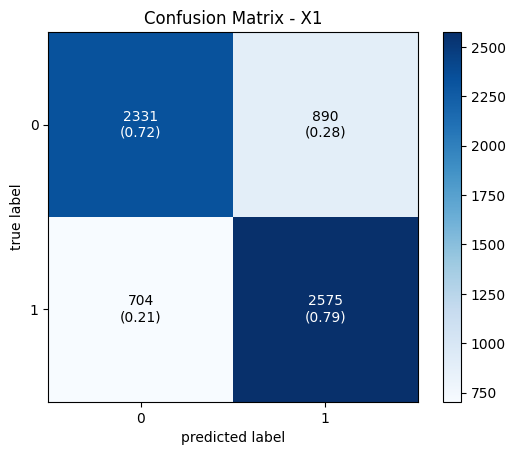

In [ ]:
#confustion m

from sklearn.metrics import confusion_matrix

confusion_matrix_X1 = confusion_matrix(y1_Test, y1_Pred)
plot_confusion_matrix(conf_mat = confusion_matrix_X1,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - X1', fontsize = 12)
plt.show()


In [ ]:
#grid search on X1

from sklearn.model_selection import GridSearchCV

#hyperparameters
penalty_list = ['L1', 'L2', 'elasticnet']
tol_list = [0.0001, 0.0005, 0.00001, 0.00005]
C_list = [0.001,0.01,0.1,1,10,100,1000]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

logreg = LogisticRegression()

param_grid = [
              {'penalty': ['l2'],
               'tol' : tol_list,
               'C' : C_list,
               'solver' : solver_list,
               'multi_class' : ['ovr'],
               'max_iter' : [100],
               'random_state' : [123]
              },
              {'penalty': ['l1'],
               'tol' : tol_list,
               'C' : C_list,
               'solver' : ['liblinear', 'saga'],
               'multi_class' : ['ovr'],
               'max_iter' : [100],
               'random_state' : [123]
              }
            ]

gs = GridSearchCV(estimator=logreg,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X1_Train, y1_Train)
print(gs.best_score_)
print(gs.best_params_)

0.7424615384615384
{'C': 0.001, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 123, 'solver': 'newton-cg', 'tol': 0.0001}


**Dataset X2**

In [ ]:
#standard scaling on datasets for X2

sc.fit(X2_Train)

X2_Train = sc.transform(X2_Train)
X2_Validate = sc.transform(X2_Validate)
X2_Test = sc.transform(X2_Test)


In [ ]:
#initialize a logistic regression model for dataset X2

lr2 = LogisticRegression(
    multi_class= 'ovr',
    max_iter=1000,
    random_state=123
)
lr2.fit(X2_Train, y2_Train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=123)

In [ ]:
#accuracy score with validation set for X2
y2_Pred = lr2.predict(X2_Validate)

score = lr2.score(X2_Validate, y2_Validate)
print(score)

0.7403076923076923


In [ ]:
#accuracy score with test set for X2
y2_Pred = lr2.predict(X2_Test)

score = lr2.score(X2_Test, y2_Test)
print(score)

print()

classification_report_X2 = classification_report(y2_Test, y2_Pred)
print(classification_report_X2)

0.7521538461538462

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3174
           1       0.75      0.77      0.76      3326

    accuracy                           0.75      6500
   macro avg       0.75      0.75      0.75      6500
weighted avg       0.75      0.75      0.75      6500



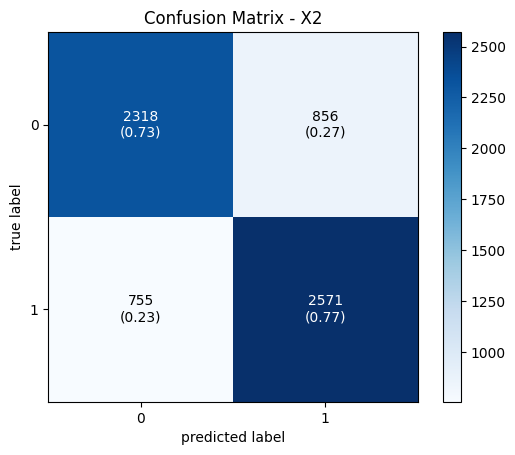

In [ ]:
#confustion matrix

confusion_matrix_X2 = confusion_matrix(y2_Test, y2_Pred)
plot_confusion_matrix(conf_mat = confusion_matrix_X2,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - X2', fontsize = 12)
plt.show()


In [ ]:
#grid search on X2

#hyperparameters
penalty_list = ['L1', 'L2', 'elasticnet']
tol_list = [0.0001, 0.0005, 0.00001, 0.00005]
C_list = [0.001,0.01,0.1,1,10,100,1000]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

logreg = LogisticRegression()

param_grid = [
              {'penalty': ['l2'],
               'tol' : tol_list,
               'C' : C_list,
               'solver' : solver_list,
               'multi_class' : ['ovr'],
               'max_iter' : [100],
               'random_state' : [123]
              },
              {'penalty': ['l1'],
               'tol' : tol_list,
               'C' : C_list,
               'solver' : ['liblinear', 'saga'],
               'multi_class' : ['ovr'],
               'max_iter' : [100],
               'random_state' : [123]
              }
            ]

gs = GridSearchCV(estimator=logreg,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X2_Train, y2_Train)
print(gs.best_score_)
print(gs.best_params_)

0.7388846153846154
{'C': 0.001, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 123, 'solver': 'sag', 'tol': 0.0001}


**Dataset X3**

In [ ]:
#standard scaling on datasets for X3

sc.fit(X3_Train)

X3_Train = sc.transform(X3_Train)
X3_Validate = sc.transform(X3_Validate)
X3_Test = sc.transform(X3_Test)


In [ ]:
#initialize a logistic regression model for dataset X3

lr3 = LogisticRegression(
    multi_class= 'ovr',
    max_iter=1000,
    random_state=123
)
lr3.fit(X3_Train, y3_Train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=123)

In [ ]:
#accuracy score with validation set for X3
y3_Pred = lr3.predict(X3_Validate)

score = lr3.score(X3_Validate, y3_Validate)
print(score)

0.748


In [ ]:
#accuracy score with test set for X3
y3_Pred = lr3.predict(X3_Test)

score = lr3.score(X3_Test, y3_Test)
print(score)

print()

classification_report_X3 = classification_report(y3_Test, y3_Pred)
print(classification_report_X3)

0.7355384615384616

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      3228
           1       0.73      0.76      0.74      3272

    accuracy                           0.74      6500
   macro avg       0.74      0.74      0.74      6500
weighted avg       0.74      0.74      0.74      6500



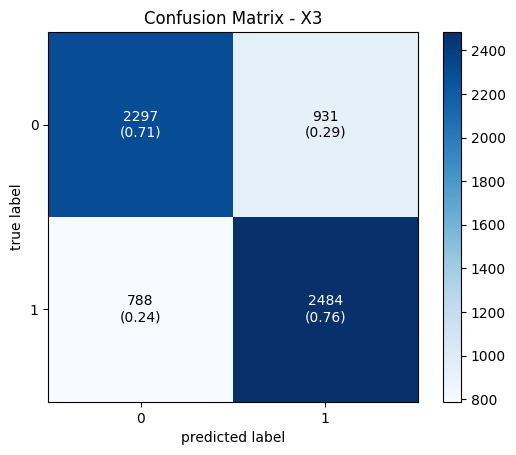

In [ ]:
#confustion matrix

confusion_matrix_X3 = confusion_matrix(y3_Test, y3_Pred)
plot_confusion_matrix(conf_mat = confusion_matrix_X3,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - X3', fontsize = 12)
plt.show()


In [ ]:
#grid search on X3

#hyperparameters
penalty_list = ['L1', 'L2', 'elasticnet']
tol_list = [0.0001, 0.0005, 0.00001, 0.00005]
C_list = [0.001,0.01,0.1,1,10,100,1000]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

logreg = LogisticRegression()

param_grid = [
              {'penalty': ['l2'],
               'tol' : tol_list,
               'C' : C_list,
               'solver' : solver_list,
               'multi_class' : ['ovr'],
               'max_iter' : [100],
               'random_state' : [123]
              },
              {'penalty': ['l1'],
               'tol' : tol_list,
               'C' : C_list,
               'solver' : ['liblinear', 'saga'],
               'multi_class' : ['ovr'],
               'max_iter' : [100],
               'random_state' : [123]
              }
            ]

gs = GridSearchCV(estimator=logreg,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X3_Train, y3_Train)
print(gs.best_score_)
print(gs.best_params_)

0.7369423076923076
{'C': 0.01, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 123, 'solver': 'liblinear', 'tol': 0.0001}


**Final Models after hyperparameter tuning**

In [ ]:
lr1_tuned = LogisticRegression(
    multi_class= 'ovr',
    max_iter=100,
    random_state=123,

    penalty = 'l2',
    C = 0.001,
    solver = 'newton-cg',
    tol =  0.0001
)
lr1_tuned.fit(X1_Train, y1_Train)

#{'C': 0.001, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 123, 'solver': 'newton-cg', 'tol': 0.0001}

LogisticRegression(C=0.001, multi_class='ovr', random_state=123,
                   solver='newton-cg')

In [ ]:
#accuracy score with test set
y1_tuned_Pred = lr1_tuned.predict(X1_Test)

score = lr1_tuned.score(X1_Test, y1_Test)
print(score)

print()

classification_report_X1_tuned = classification_report(y1_Test, y1_tuned_Pred)
print(classification_report_X1_tuned)

0.7524615384615385

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      3221
           1       0.74      0.78      0.76      3279

    accuracy                           0.75      6500
   macro avg       0.75      0.75      0.75      6500
weighted avg       0.75      0.75      0.75      6500



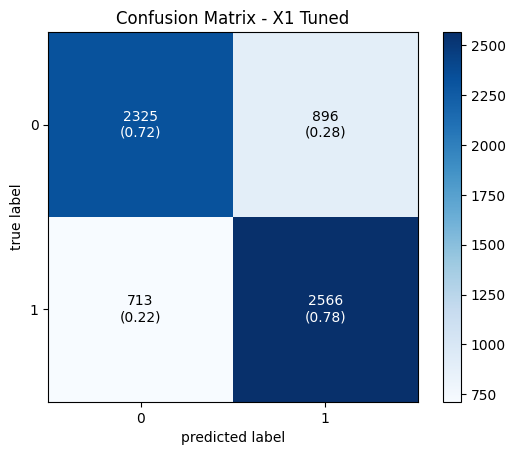

In [ ]:
confusion_matrix_X1_tuned = confusion_matrix(y1_Test, y1_tuned_Pred)
plot_confusion_matrix(conf_mat = confusion_matrix_X1_tuned,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - X1 Tuned', fontsize = 12)
plt.show()


In [ ]:
lr2_tuned = LogisticRegression(
    multi_class= 'ovr',
    max_iter=100,
    random_state=123,

    penalty = 'l2',
    C = 0.001,
    solver = 'sag',
    tol =  0.0001
)
lr2_tuned.fit(X2_Train, y2_Train)

#{'C': 0.001, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 123, 'solver': 'sag', 'tol': 0.0001}


LogisticRegression(C=0.001, multi_class='ovr', random_state=123, solver='sag')

In [ ]:
#accuracy score with test set
y2_tuned_Pred = lr2_tuned.predict(X2_Test)

score = lr2_tuned.score(X2_Test, y2_Test)
print(score)

print()

classification_report_X2_tuned = classification_report(y2_Test, y2_tuned_Pred)
print(classification_report_X2_tuned)

0.75

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3174
           1       0.75      0.77      0.76      3326

    accuracy                           0.75      6500
   macro avg       0.75      0.75      0.75      6500
weighted avg       0.75      0.75      0.75      6500



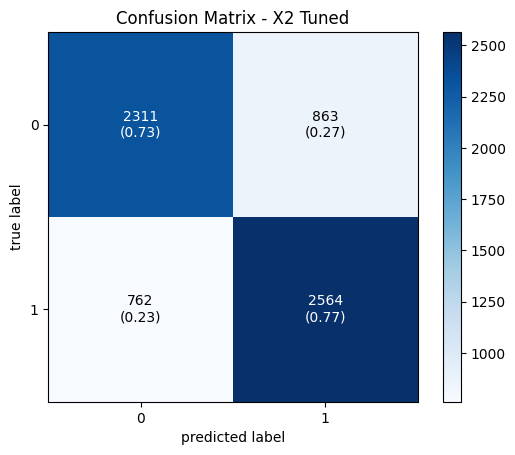

In [ ]:
confusion_matrix_X2_tuned = confusion_matrix(y2_Test, y2_tuned_Pred)
plot_confusion_matrix(conf_mat = confusion_matrix_X2_tuned,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - X2 Tuned', fontsize = 12)
plt.show()


In [ ]:
lr3_tuned = LogisticRegression(
    multi_class= 'ovr',
    max_iter=100,
    random_state=123,

    penalty = 'l2',
    C = 0.001,
    solver = 'sag',
    tol =  0.0001
)
lr3_tuned.fit(X3_Train, y3_Train)

#{'C': 0.001, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 123, 'solver': 'sag', 'tol': 0.0001}


LogisticRegression(C=0.001, multi_class='ovr', random_state=123, solver='sag')

In [ ]:
#accuracy score with test set
y3_tuned_Pred = lr3_tuned.predict(X3_Test)

score = lr3_tuned.score(X3_Test, y3_Test)
print(score)

print()

classification_report_X3_tuned = classification_report(y3_Test, y3_tuned_Pred)
print(classification_report_X3_tuned)

0.736

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      3228
           1       0.73      0.76      0.74      3272

    accuracy                           0.74      6500
   macro avg       0.74      0.74      0.74      6500
weighted avg       0.74      0.74      0.74      6500



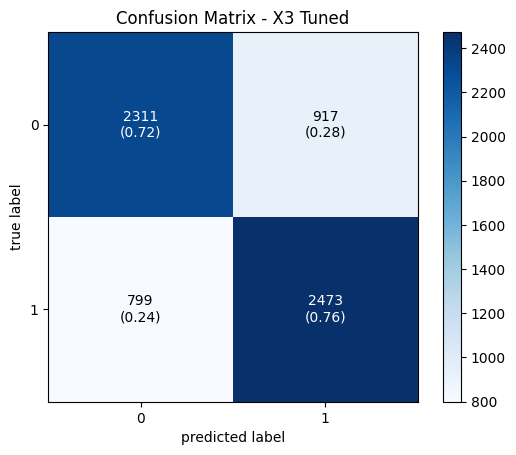

In [ ]:
confusion_matrix_X3_tuned = confusion_matrix(y3_Test, y3_tuned_Pred)
plot_confusion_matrix(conf_mat = confusion_matrix_X3_tuned,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - X3 Tuned', fontsize = 12)
plt.show()


--------------------------------------------------------------------------------
# **Decision Tree - Training and Testing**

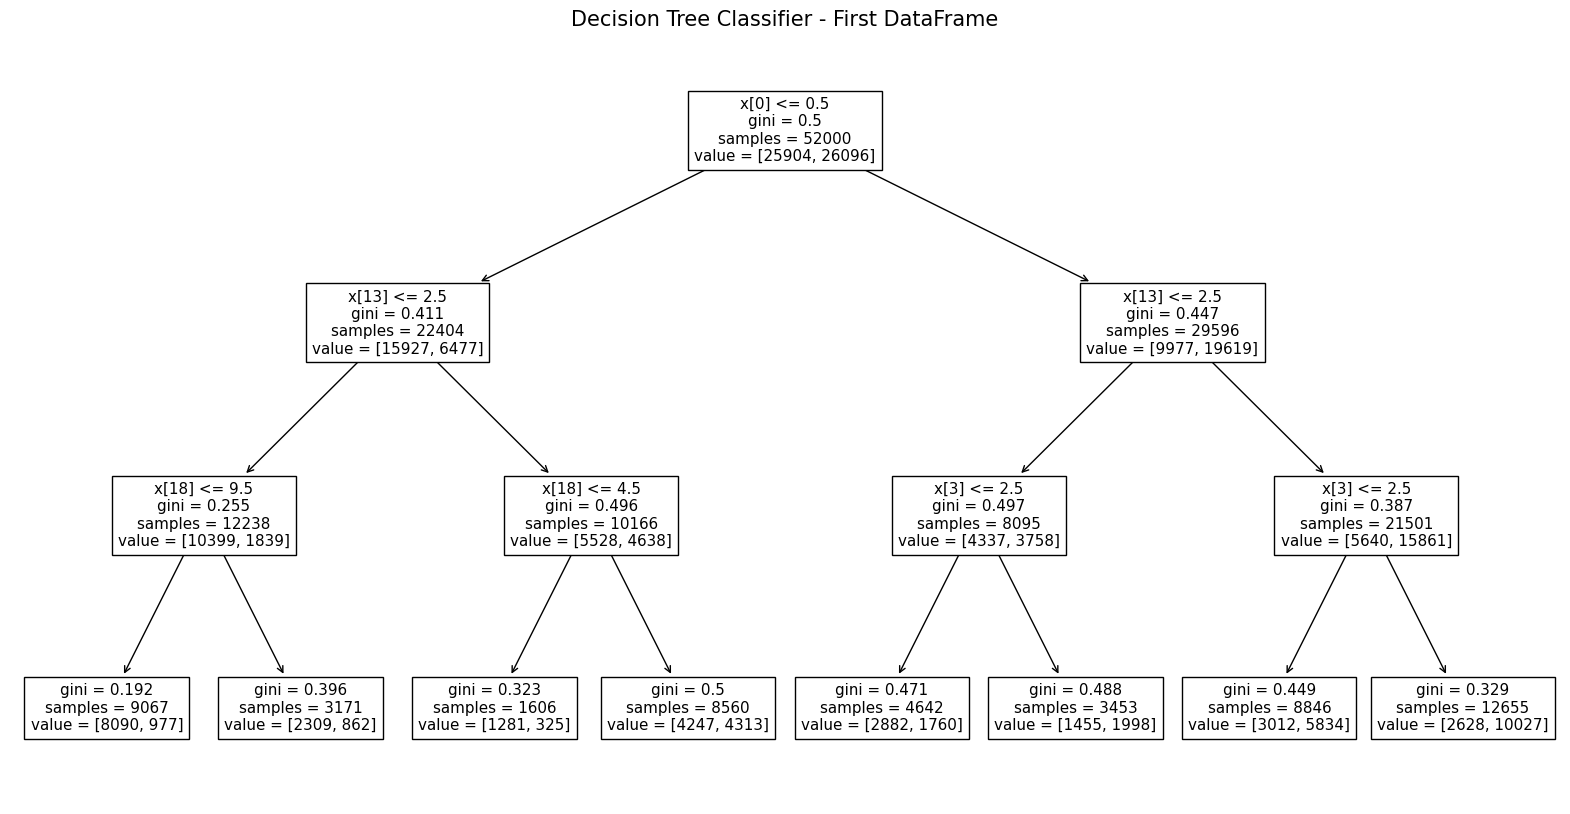

In [ ]:
# Decision Tree Classifier - First DataFrame

DecisionTree_X1 = DecisionTreeClassifier(max_depth = 3)

# Fitting the model on the Train Data
DecisionTree_X1.fit(X1_Train, y1_Train)

# Predicting values on Test Data
Predictions_X1 = DecisionTree_X1.predict(X1_Test)

# Plotting Decision Tree Classifier
plt.figure(figsize = (20,10))
tree.plot_tree(DecisionTree_X1)
plt.title('Decision Tree Classifier - First DataFrame', fontsize = 15)
plt.show()

In [ ]:
# True vs. Predicted values - First DataFrame

Pred_X1 = pd.DataFrame()
Pred_X1['True Values'] = y1_Test
Pred_X1['Predicted Values'] = Predictions_X1
Pred_X1

True Values  Predicted Values
64392            1                 1
35332            1                 1
45296            1                 1
46856            1                 1
34777            1                 1
...            ...               ...
24239            0                 1
33219            1                 0
22373            0                 0
11118            0                 1
27285            0                 0

[6500 rows x 2 columns]

In [ ]:
# Evaluation - First DataFrame

# Calculating Accuracy
Accuracy_X1 = accuracy_score(y1_Test, Predictions_X1)
Accuracies = {}
Accuracies['Decision Tree Classifier - First DataFrame'] = Accuracy_X1

# Calculating Classification Report
ClassificationReport_X1 = classification_report(y1_Test, Predictions_X1)

# Calculating MSE
MSE = mean_squared_error(y1_Test, Predictions_X1)

# Calculating RMSE
RMSE = math.sqrt(MSE)
print('\nAccuracy Score of Decision Tree Classifier: ' + str(round(Accuracy_X1*100, 2)))
print('\nClassification Report: ')
print(ClassificationReport_X1)
print('\nMean Squared Error: '+ str(MSE))
print('\nRoot Mean Squared Error: '+ str(RMSE))


Accuracy Score of Decision Tree Classifier: 70.65

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.56      0.66      3293
           1       0.66      0.85      0.74      3207

    accuracy                           0.71      6500
   macro avg       0.73      0.71      0.70      6500
weighted avg       0.73      0.71      0.70      6500


Mean Squared Error: 0.2935384615384615

Root Mean Squared Error: 0.5417918987383085


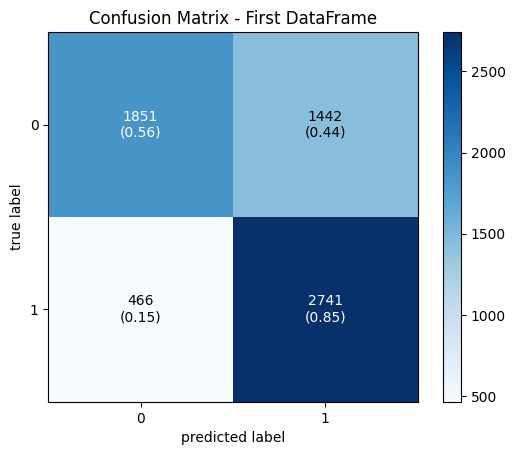

In [ ]:
# Calculating and Plotting the Confusion Matrix

ConfusionMatrix_X1 = confusion_matrix(y1_Test, Predictions_X1)
plot_confusion_matrix(conf_mat = ConfusionMatrix_X1,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - First DataFrame', fontsize = 12)
plt.show()

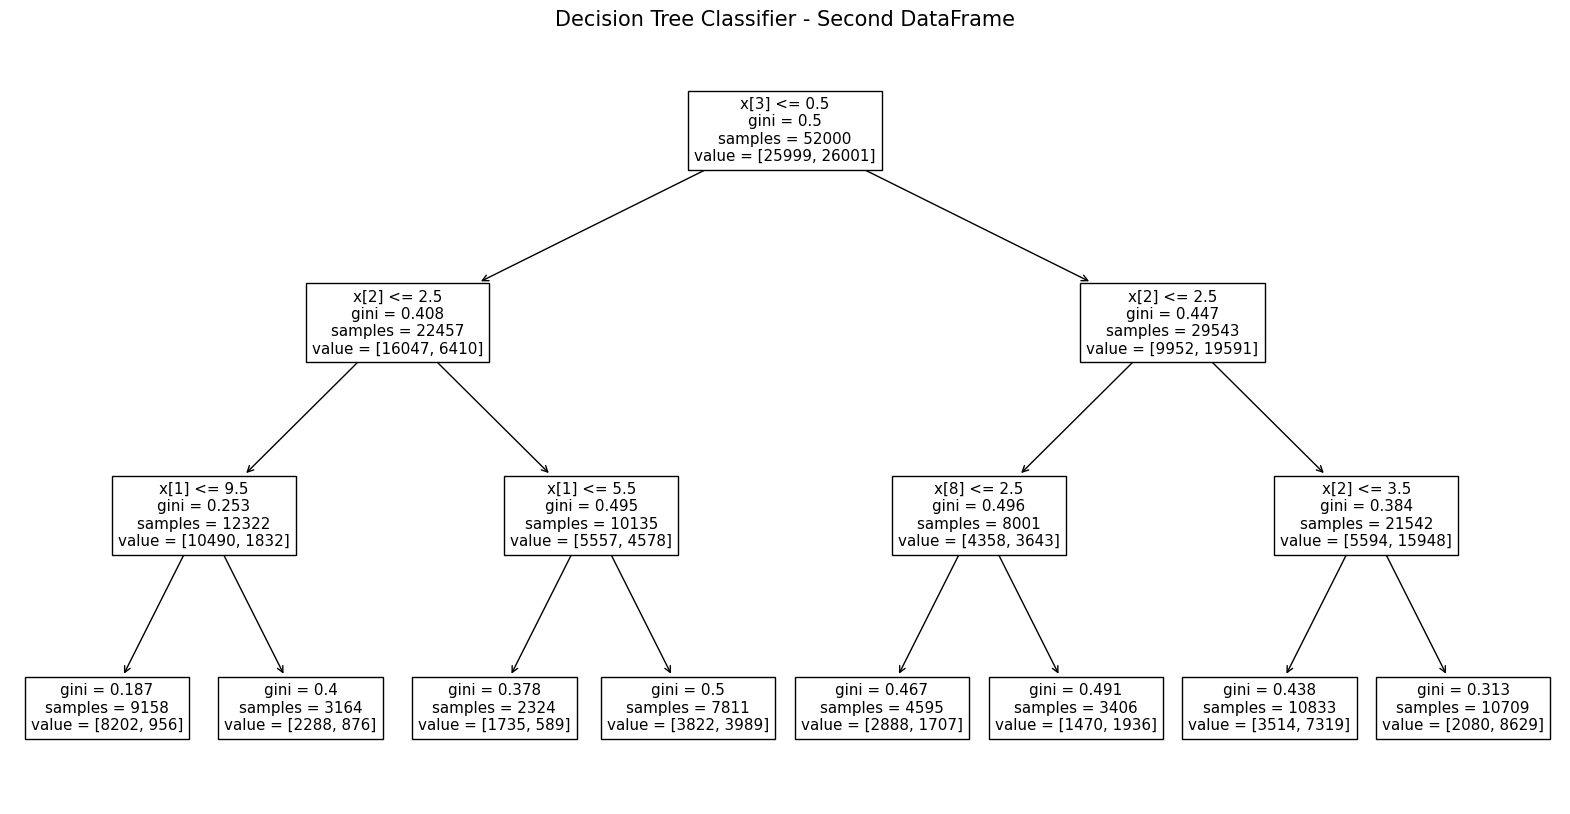

In [ ]:
# Decision Tree Classifier - Second DataFrame

DecisionTree_X2 = DecisionTreeClassifier(max_depth = 3)

# Fitting the model on the Train Data
DecisionTree_X2.fit(X2_Train, y2_Train)

# Predicting values on Test Data
Predictions_X2 = DecisionTree_X2.predict(X2_Test)

# Plotting Decision Tree Classifier
plt.figure(figsize = (20,10))
tree.plot_tree(DecisionTree_X2)
plt.title('Decision Tree Classifier - Second DataFrame', fontsize = 15)
plt.show()

In [ ]:
# True vs. Predicted values - Second DataFrame

Pred_X2 = pd.DataFrame()
Pred_X2['True Values'] = y2_Test
Pred_X2['Predicted Values'] = Predictions_X2
Pred_X2

True Values  Predicted Values
36126            1                 1
26060            0                 0
9001             0                 1
25830            0                 0
5033             0                 1
...            ...               ...
35556            1                 1
3359             0                 0
46041            1                 1
44487            1                 1
29979            0                 0

[6500 rows x 2 columns]

In [ ]:
# Evaluation - Second DataFrame

# Calculating Accuracy
Accuracy_X2 = accuracy_score(y2_Test, Predictions_X2)
Accuracies['Decision Tree Classifier - Second DataFrame'] = Accuracy_X2

# Calculating Classification Report
ClassificationReport_X2 = classification_report(y2_Test, Predictions_X2)

# Calculating MSE
MSE = mean_squared_error(y2_Test, Predictions_X2)

# Calculating RMSE
RMSE = math.sqrt(MSE)
print('\nAccuracy Score of Decision Tree Classifier: ' + str(round(Accuracy_X2*100, 2)))
print('\nClassification Report: ')
print(ClassificationReport_X2)
print('\nMean Squared Error: '+ str(MSE))
print('\nRoot Mean Squared Error: '+ str(RMSE))


Accuracy Score of Decision Tree Classifier: 70.51

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      3213
           1       0.67      0.84      0.74      3287

    accuracy                           0.71      6500
   macro avg       0.72      0.70      0.70      6500
weighted avg       0.72      0.71      0.70      6500


Mean Squared Error: 0.2949230769230769

Root Mean Squared Error: 0.5430682065110025


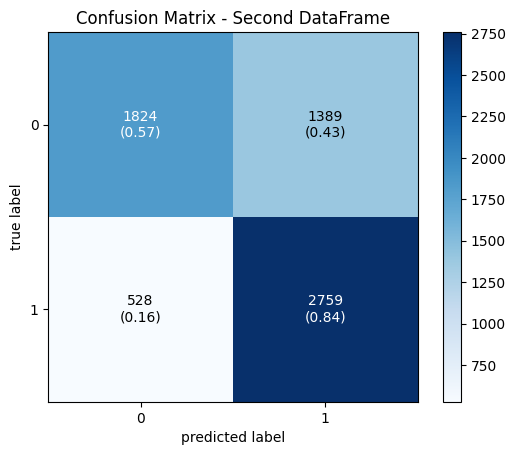

In [ ]:
# Calculating and Plotting the Confusion Matrix

ConfusionMatrix_X2 = confusion_matrix(y2_Test, Predictions_X2)
plot_confusion_matrix(conf_mat = ConfusionMatrix_X2,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - Second DataFrame', fontsize = 12)
plt.show()

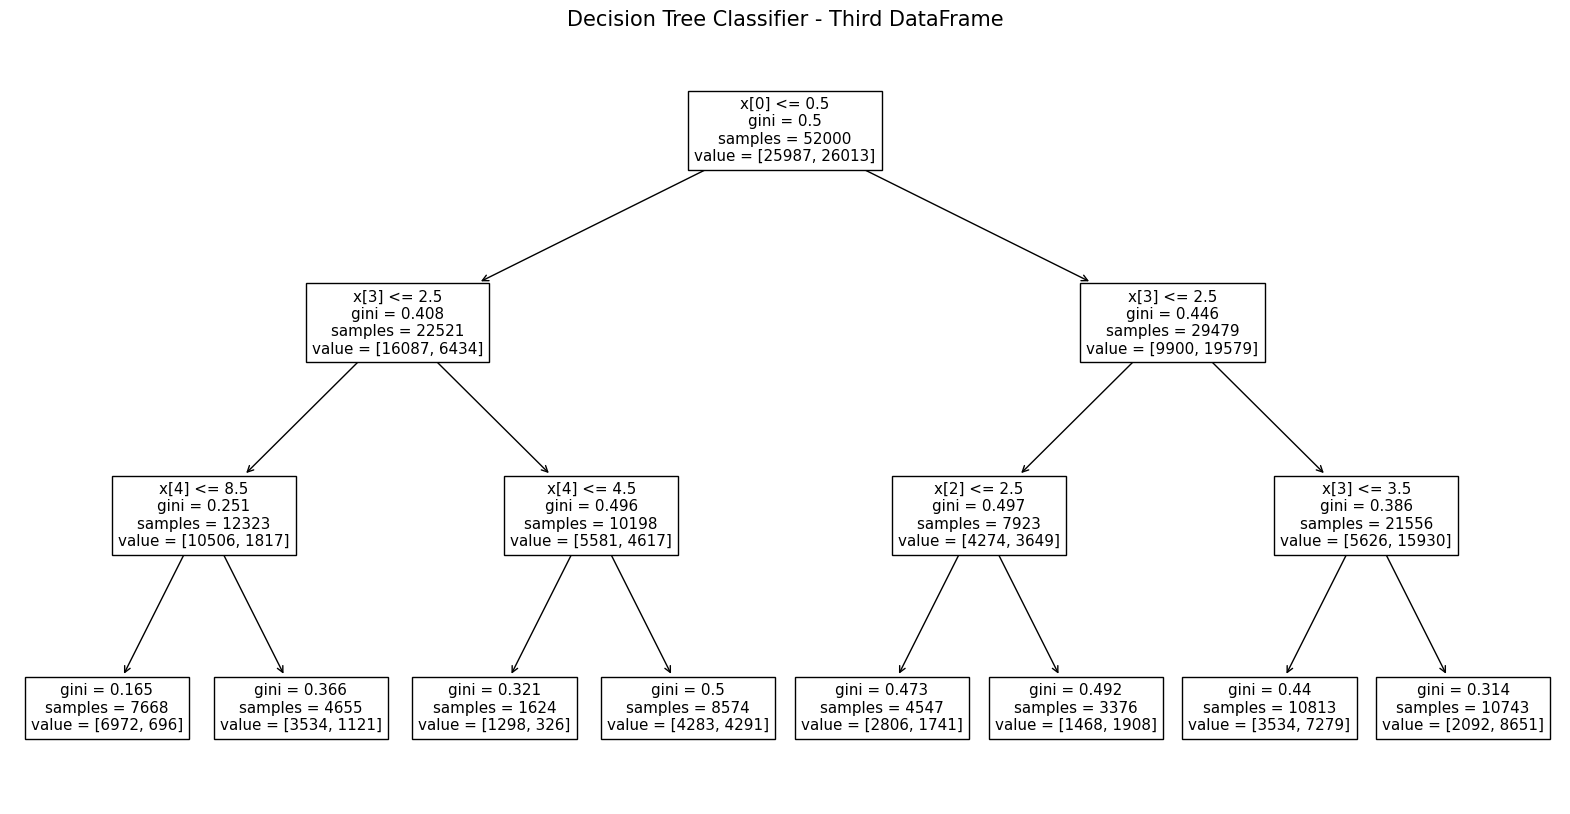

In [ ]:
# Decision Tree Classifier - Third DataFrame

DecisionTree_X3 = DecisionTreeClassifier(max_depth = 3)

# Fitting the model on the Train Data
DecisionTree_X3.fit(X3_Train, y3_Train)

# Predicting values on Test Data
Predictions_X3 = DecisionTree_X3.predict(X3_Test)

# Plotting Decision Tree Classifier
plt.figure(figsize = (20,10))
tree.plot_tree(DecisionTree_X3)
plt.title('Decision Tree Classifier - Third DataFrame', fontsize = 15)
plt.show()

In [ ]:
# True vs. Predicted values - Third DataFrame

Pred_X3 = pd.DataFrame()
Pred_X3['True Values'] = y3_Test
Pred_X3['Predicted Values'] = Predictions_X3
Pred_X3

True Values  Predicted Values
35090            1                 1
46535            1                 1
54955            1                 1
9869             0                 1
26514            0                 0
...            ...               ...
15642            0                 0
32314            0                 0
52634            1                 0
56084            1                 1
32269            0                 1

[6500 rows x 2 columns]

In [ ]:
# Evaluation - Third DataFrame

# Calculating Accuracy
Accuracy_X3 = accuracy_score(y3_Test, Predictions_X3)
Accuracies['Decision Tree Classifier - Third DataFrame'] = Accuracy_X3

# Calculating Classification Report
ClassificationReport_X3 = classification_report(y3_Test, Predictions_X3)

# Calculating MSE
MSE = mean_squared_error(y3_Test, Predictions_X3)

# Calculating RMSE
RMSE = math.sqrt(MSE)
print('\nAccuracy Score of Decision Tree Classifier: ' + str(round(Accuracy_X3*100, 2)))
print('\nClassification Report: ')
print(ClassificationReport_X3)
print('\nMean Squared Error: '+ str(MSE))
print('\nRoot Mean Squared Error: '+ str(RMSE))


Accuracy Score of Decision Tree Classifier: 70.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.57      0.66      3247
           1       0.66      0.85      0.75      3253

    accuracy                           0.71      6500
   macro avg       0.73      0.71      0.70      6500
weighted avg       0.73      0.71      0.70      6500


Mean Squared Error: 0.2903076923076923

Root Mean Squared Error: 0.538802090110731


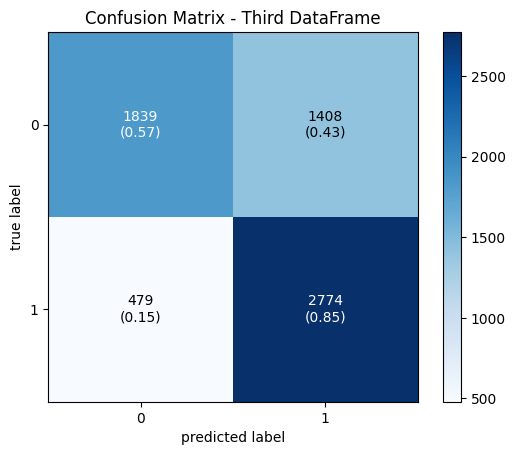

In [ ]:
# Calculating and Plotting the Confusion Matrix

ConfusionMatrix_X3 = confusion_matrix(y3_Test, Predictions_X3)
plot_confusion_matrix(conf_mat = ConfusionMatrix_X3,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - Third DataFrame', fontsize = 12)
plt.show()

--------------------------------------------------------------------------------
# **Decision Tree - Grid Search**

In [ ]:
# Using StandardScaler and PCA
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

# Using Pipeline for GridSearchCV
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

# Using GridSearchCV and Printing Results
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 21

DecisionTreeClassifier(max_depth=6)


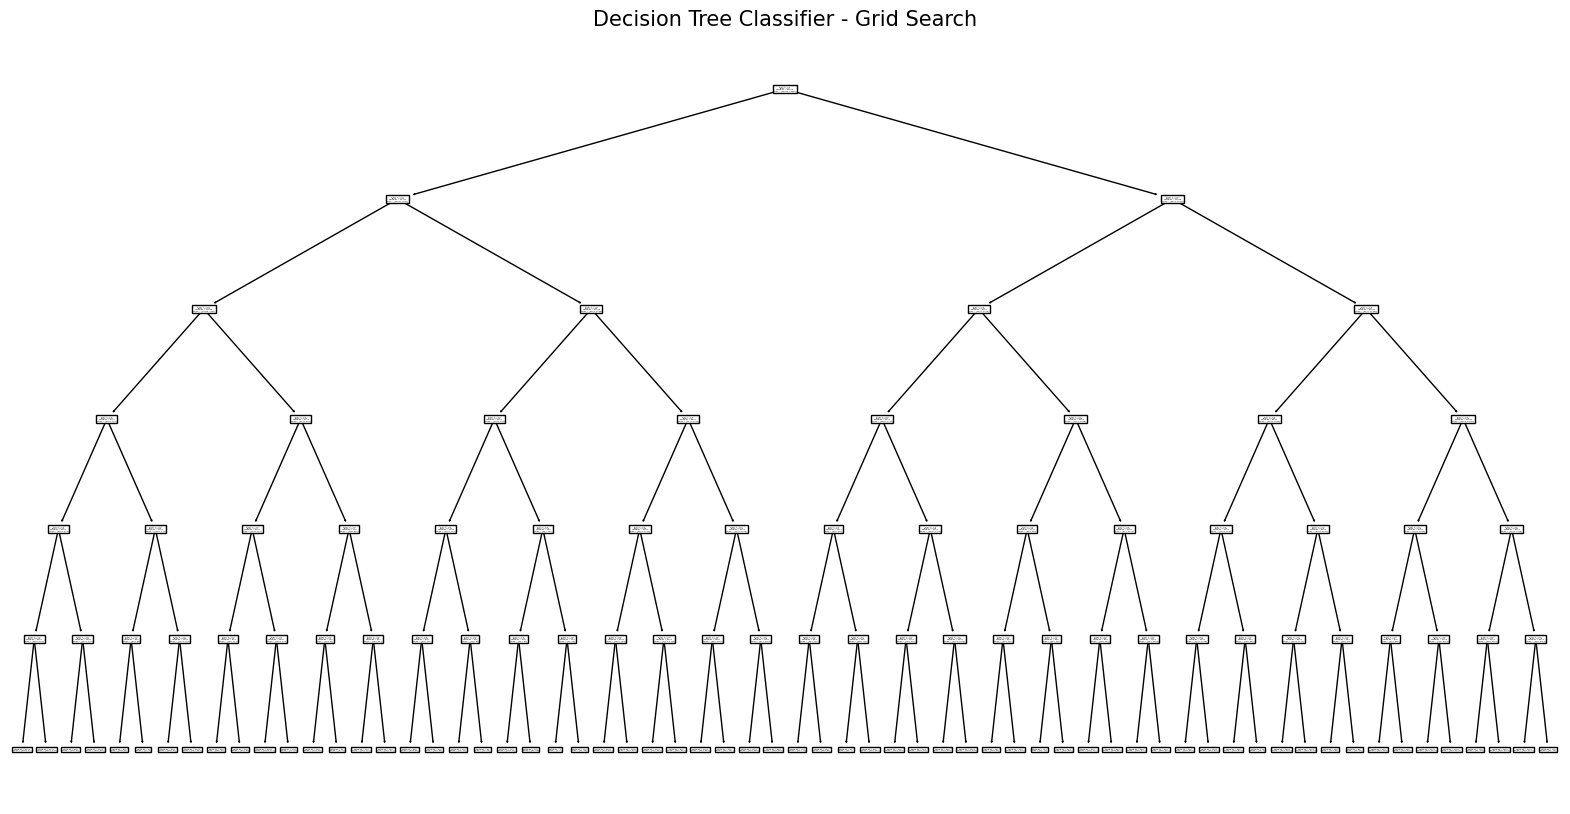

In [ ]:
# Decision Tree Classifier - Grid Search

DecisionTree_GS = DecisionTreeClassifier(max_depth = 6, criterion = 'gini')

# Fitting the model on the Train Data
DecisionTree_GS.fit(X1_Train, y1_Train)

# Predicting values on Test Data
Predictions_GS = DecisionTree_GS.predict(X1_Test)

# Plotting Decision Tree Classifier
plt.figure(figsize = (20,10))
tree.plot_tree(DecisionTree_GS)
plt.title('Decision Tree Classifier - Grid Search', fontsize = 15)
plt.show()

In [ ]:
# True vs. Predicted values - Grid Search

Pred_GS = pd.DataFrame()
Pred_GS['True Values'] = y1_Test
Pred_GS['Predicted Values'] = Predictions_GS
Pred_GS

True Values  Predicted Values
64392            1                 1
35332            1                 1
45296            1                 1
46856            1                 1
34777            1                 1
...            ...               ...
24239            0                 1
33219            1                 1
22373            0                 0
11118            0                 1
27285            0                 0

[6500 rows x 2 columns]

In [ ]:
# Evaluation - Grid Search

# Calculating Accuracy
Accuracy_GS = accuracy_score(y1_Test, Predictions_GS)
Accuracies['Decision Tree Classifier - Grid Search'] = Accuracy_GS

# Calculating Classification Report
ClassificationReport_GS = classification_report(y1_Test, Predictions_GS)

# Calculating MSE
MSE = mean_squared_error(y1_Test, Predictions_GS)

# Calculating RMSE
RMSE = math.sqrt(MSE)
print('\nAccuracy Score of Decision Tree Classifier: ' + str(round(Accuracy_GS*100, 2)))
print('\nClassification Report: ')
print(ClassificationReport_GS)
print('\nMean Squared Error: '+ str(MSE))
print('\nRoot Mean Squared Error: '+ str(RMSE))


Accuracy Score of Decision Tree Classifier: 73.91

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      3293
           1       0.73      0.75      0.74      3207

    accuracy                           0.74      6500
   macro avg       0.74      0.74      0.74      6500
weighted avg       0.74      0.74      0.74      6500


Mean Squared Error: 0.2609230769230769

Root Mean Squared Error: 0.510806300786391


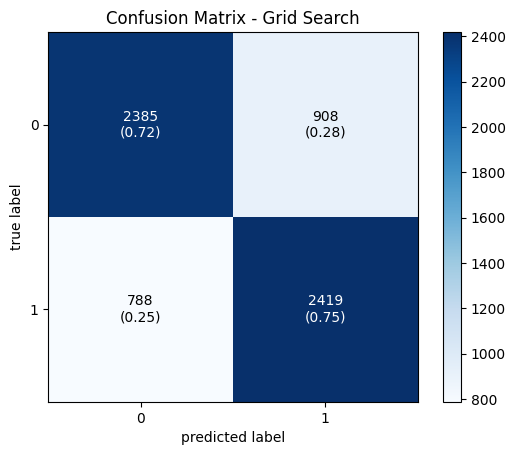

In [ ]:
# Calculating and Plotting the Confusion Matrix

ConfusionMatrix_GS = confusion_matrix(y1_Test, Predictions_GS)
plot_confusion_matrix(conf_mat = ConfusionMatrix_GS,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.title('Confusion Matrix - Grid Search', fontsize = 12)
plt.show()

--------------------------------------------------------------------------------
# **Decision Tree - Accuracy Comparison**

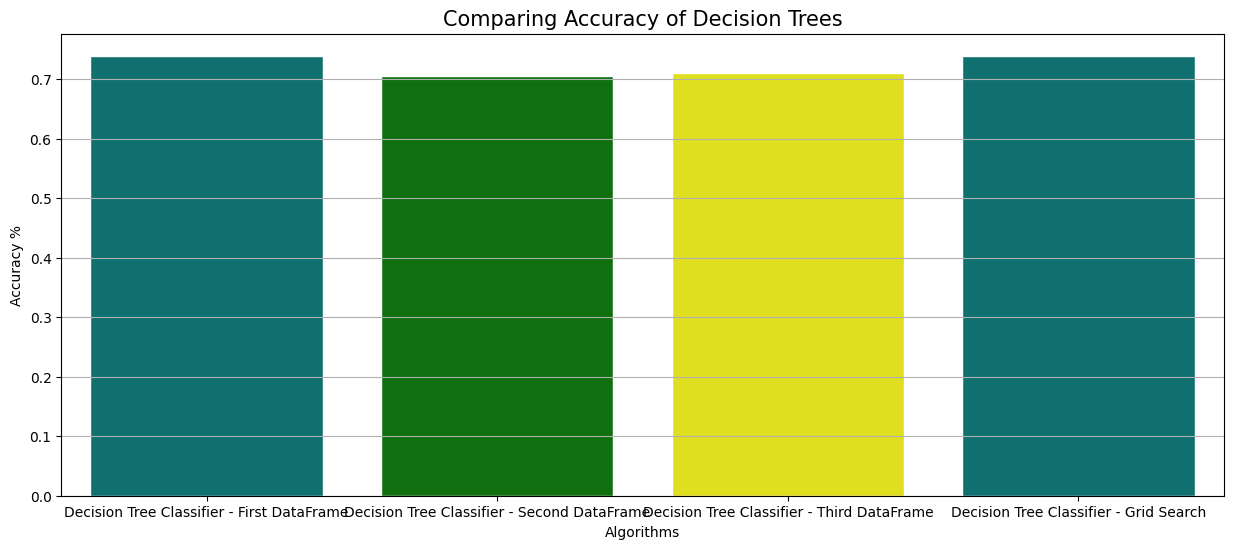

In [ ]:
colors = ["teal", "green", "yellow"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()), palette=colors)
plt.title('Comparing Accuracy of Decision Trees', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.show()

Recall is more important where overlooked cases (false negatives) are more costly than false alarms (false positives). The focus in these problems is finding the positive cases. On the other hand, precision is more important where false alarms (false positives) are more costly than overlooked cases (false negatives). The focus in these problems is in weeding out the negative cases.

Recall is very used when you must correctly classify some event that has already occurred. For example, fraud detection models must have a high recall to detect frauds properly. In such situations, we don’t care about the real 0s, because we are interested only in spotting the real 1s as often as possible.

Common uses of recall are, as said, fraud detection models and disease detection on a patient. If somebody is ill, we need to spot their illness avoiding the false negatives. A false negative patient may become contagious and it’s not safe. That’s why, when we must spot an event that already occurred, we need to work with recall.